#Make the necessary directories to organise the data files

In [1]:
%%bash
mkdir workspace
cd workspace
mkdir training_demo

In [2]:
%%bash
cd workspace/training_demo
mkdir annotations
mkdir exported-models
mkdir images
mkdir models
mkdir models/ssd_mobnet_model
mkdir pre-trained-models

In [3]:
%%bash
mkdir scripts

#Make sure to have tensorflow 2.11 installed

In [4]:
!pip install --upgrade -q pip
!pip install --upgrade -q tensorflow==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 95.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-datasets 4.9.2 requires protobuf>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.


#Clone into tensorflow object detection models directory

In [5]:
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3843, done.
remote: Counting objects: 100% (3843/3843), done.
remote: Compressing objects: 100% (2953/2953), done.
remote: Total 3843 (delta 1109), reused 1944 (delta 839), pack-reused 0
Receiving objects: 100% (3843/3843), 49.59 MiB | 22.21 MiB/s, done.
Resolving deltas: 100% (1109/1109), done.


#Make sure to install pycocotools into the environment otherwise the object detection model cannot be loaded with the right weights

In [6]:
!pip install -q cython
!pip install -q pycocotools

In [7]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install -q .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
!tar -xf ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
!mkdir /content/workspace/training_demo/pre-trained-models/ssd_modnet_model
!mv ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/* /content/workspace/training_demo/pre-trained-models/ssd_modnet_model/
!rmdir ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8

--2023-05-25 03:18:13--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.122.128, 2607:f8b0:4004:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.122.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20518283 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.57M  --.-KB/s    in 0.1s    

2023-05-25 03:18:14 (161 MB/s) - ‘ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz’ saved [20518283/20518283]



#You will need the protobuf 3.2 for the object detection module

In [9]:
!pip install protobuf==3.20.*

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.22.5
    Uninstalling protobuf-4.22.5:
      Successfully uninstalled protobuf-4.22.5


In [1]:
import matplotlib
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


#Let's arrange some training data for ourselves

In [2]:
%%bash
curl -L "https://public.roboflow.com/ds/Y5ewkSpeDm?key=4kE1AReL33" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.xml  
 extracting: test/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.xml  
 extracting: test/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.xml  
 extracting: test/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.xml  
 extracting: test/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.xml  
 extracting: test/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting: test/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.xml  
 extracting: test/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   891  100   891    0     0   4664      0 --:--:-- --:--:-- --:--:--  4664
100 46.5M  100 46.5M    0     0  61.5M      0 --:--:-- --:--:-- --:--:--  153M


#Move the data around into relevant directories and also delete the irrelevant files

In [3]:
!rm /content/README.dataset.txt
!rm /content/README.roboflow.txt

In [4]:
!mv /content/test /content/workspace/training_demo/images
!mv /content/train /content/workspace/training_demo/images
!mv /content/valid /content/workspace/training_demo/images

In [5]:
from glob import glob

In [6]:
%%bash
mkdir /content/workspace/training_demo/images/test-annot-xml
mkdir /content/workspace/training_demo/images/train-annot-xml

In [7]:
path1 = '/content/workspace/training_demo/images/test'
test_files = glob(path1 + '/*')
print(len(test_files))

134


In [8]:
for i in test_files:
  if (i[-3:] == 'xml'):
    !mv {i} /content/workspace/training_demo/images/test-annot-xml/

In [9]:
path1 = '/content/workspace/training_demo/images/valid'
val_files = glob(path1 + '/*')
print(len(val_files))

266


In [10]:
for i in val_files:
  if (i[-3:] == 'xml'):
    !mv {i} /content/workspace/training_demo/images/test-annot-xml/

In [11]:
path1 = '/content/workspace/training_demo/images/test-annot-xml'
files = glob(path1 + '/*')
print(len(files))

200


In [13]:
!mv /content/workspace/training_demo/images/valid/* /content/workspace/training_demo/images/test/

In [14]:
path1 = '/content/workspace/training_demo/images/test'
files = glob(path1 + '/*')
print(len(files))

200


Before running this cell I just renamed /content/workspace/training_demo/images/train to /content/workspace/training_demo/images/training

In [15]:
path2 = '/content/workspace/training_demo/images/training'
files = glob(path2 + '/*')
print(len(files))

930


In [16]:
for i in files:
  if (i[-3:] == 'xml'):
    !mv {i} /content/workspace/training_demo/images/train-annot-xml/

In [17]:
path2 = '/content/workspace/training_demo/images/train-annot-xml'
files = glob(path2 + '/*')
print(len(files))

465


In [18]:
!mv /content/workspace/training_demo/images/train-annot-xml /content/workspace/training_demo/annotations/train-annot-xml
!mv /content/workspace/training_demo/images/test-annot-xml /content/workspace/training_demo/annotations/test-annot-xml

In [19]:
!rm -rf /content/workspace/training_demo/images/valid

#Making the label_map.pbtxt file with the necessary numerical mappings to the labels

In [20]:
labels = [{'name':'pothole', 'id':1}]
print(labels)

[{'name': 'pothole', 'id': 1}]


In [21]:
labelmap_path = '/content/workspace/training_demo/annotations/label_map.pbtxt'
with open(labelmap_path, 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [22]:
config_path = '/content/workspace/training_demo/pre-trained-models/ssd_modnet_model/pipeline.config'
!cp {config_path} /content/workspace/training_demo/models/ssd_mobnet_model/
config_path = '/content/workspace/training_demo/models/ssd_mobnet_model/pipeline.config'

In [23]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(config_path, "r") as f:
    proto_str = f.read()
    text_format.Merge(proto_str, pipeline_config) 

In [24]:
pipeline_config.model.ssd.num_classes = 1
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = '/content/workspace/training_demo/pre-trained-models/ssd_modnet_model/checkpoint/ckpt-0'
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= labelmap_path
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = ['/content/workspace/training_demo/annotations/train.record']
pipeline_config.eval_input_reader[0].label_map_path = labelmap_path
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = ['/content/workspace/training_demo/annotations/test.record']
# add coco for evaluating the model 
pipeline_config.eval_config.metrics_set[0] = "coco_detection_metrics"
pipeline_config.eval_config.use_moving_averages = False

In [25]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(config_path, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

#Generate the train.record and test.record files

In [26]:
from google.colab import files
files.upload() 
!mv generate_tfrecord.py scripts/

Saving generate_tfrecord.py to generate_tfrecord.py


In [27]:
%%bash
cd workspace/training_demo/annotations
python /content/scripts/generate_tfrecord.py -x train-annot-xml/ -i /content/workspace/training_demo/images/training -l label_map.pbtxt -o train.record
python /content/scripts/generate_tfrecord.py -x test-annot-xml/ -i /content/workspace/training_demo/images/test -l label_map.pbtxt -o test.record

Successfully created the TFRecord file: train.record
Successfully created the TFRecord file: test.record


#Train the model

In [28]:
steps = 2500
!python /content/models/research/object_detection/model_main_tf2.py --model_dir=/content/workspace/training_demo/models/ssd_mobnet_model --pipeline_config_path={config_path} --num_train_steps={steps}

2023-05-25 03:35:10.402578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
W0525 03:35:13.530863 140167984592704 cross_device_ops.py:1387] There are non-GPU devices in `tf.distribute.Strategy`, not using nccl allreduce.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
I0525 03:35:13.564467 140167984592704 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:local

In [ ]:
exporter_main_v2_path = '/content/models/research/object_detection/exporter_main_v2.py'

In [ ]:
!python {exporter_main_v2_path} --input_type image_tensor --pipeline_config_path {config_path} --trained_checkpoint_dir /content/workspace/training_demo/models/ssd_mobnet_model --output_directory /content/workspace/training_demo/exported-models

In [ ]:
!cp {labelmap_path} /content/workspace/training_demo/exported-models/saved_model/assets

In [32]:
!zip -r /content/workspace/training_demo/exported-models/pothole-detection-model-ssd.zip /content/workspace/training_demo/exported-models

  adding: content/workspace/training_demo/exported-models/ (stored 0%)
  adding: content/workspace/training_demo/exported-models/checkpoint/ (stored 0%)
  adding: content/workspace/training_demo/exported-models/checkpoint/ckpt-0.index (deflated 80%)
  adding: content/workspace/training_demo/exported-models/checkpoint/ckpt-0.data-00000-of-00001 (deflated 8%)
  adding: content/workspace/training_demo/exported-models/checkpoint/checkpoint (deflated 41%)
  adding: content/workspace/training_demo/exported-models/pipeline.config (deflated 69%)
  adding: content/workspace/training_demo/exported-models/saved_model/ (stored 0%)
  adding: content/workspace/training_demo/exported-models/saved_model/assets/ (stored 0%)
  adding: content/workspace/training_demo/exported-models/saved_model/assets/label_map.pbtxt (stored 0%)
  adding: content/workspace/training_demo/exported-models/saved_model/fingerprint.pb (stored 0%)
  adding: content/workspace/training_demo/exported-models/saved_model/variables/ 

In [33]:
from google.colab import files
files.download('/content/workspace/training_demo/exported-models/pothole-detection-model-ssd.zip') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
from object_detection.utils import label_map_util
detect_fn_saved_model = tf.saved_model.load('/content/workspace/training_demo/exported-models/saved_model')

In [35]:
def load_image_into_numpy_array(path):
    """
    Load an image from file into a numpy array.
    """
    img = tf.keras.preprocessing.image.load_img(path)
    return tf.keras.preprocessing.image.img_to_array(img)

#Here you can upload a test image

#Here are some test results

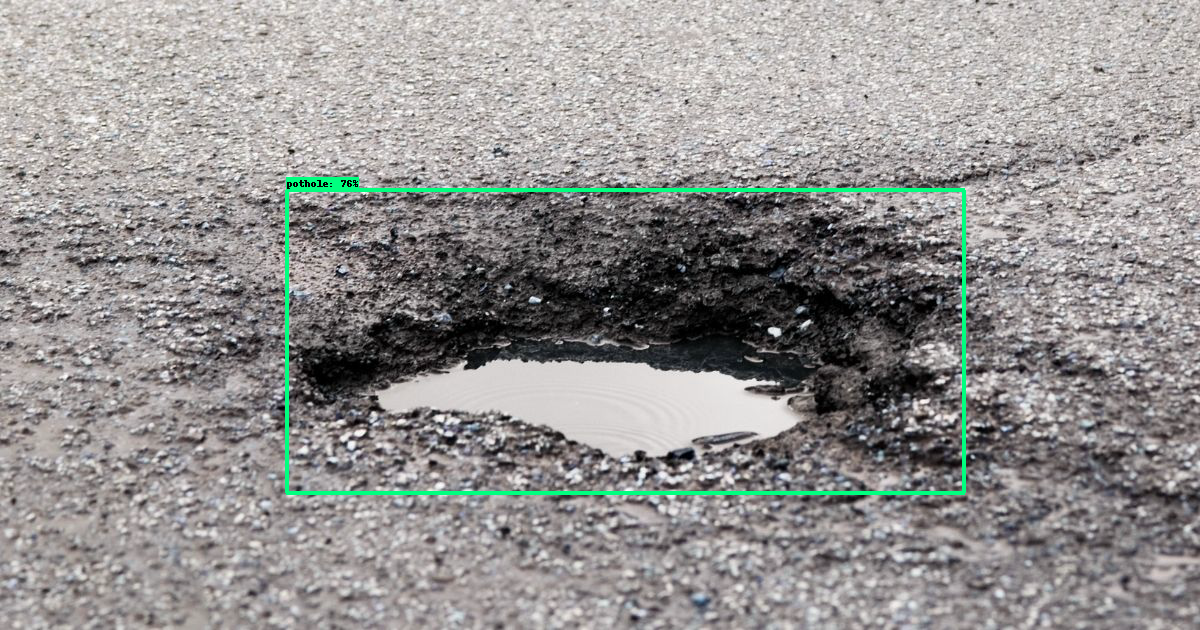

In [44]:
test_image_path = '/content/deep-pothole.jpg'
image_np = load_image_into_numpy_array(test_image_path)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.uint8)
category_index = label_map_util.create_category_index_from_labelmap('/content/workspace/training_demo/exported-models/saved_model/assets/label_map.pbtxt')
detections = detect_fn_saved_model(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

dt_boxes = detections['detection_boxes']
dt_classes = detections['detection_classes']
dt_scores = detections['detection_scores']
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    dt_boxes,
    dt_classes,
    dt_scores,
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.65
)
from google.colab.patches import cv2_imshow
cv2_imshow(image_np_with_detections)

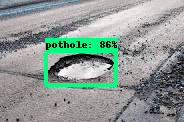

In [45]:
test_image_path = '/content/pothole2.jpeg'
image_np = load_image_into_numpy_array(test_image_path)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.uint8)
category_index = label_map_util.create_category_index_from_labelmap('/content/workspace/training_demo/exported-models/saved_model/assets/label_map.pbtxt')
detections = detect_fn_saved_model(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

dt_boxes = detections['detection_boxes']
dt_classes = detections['detection_classes']
dt_scores = detections['detection_scores']
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    dt_boxes,
    dt_classes,
    dt_scores,
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.65
)
from google.colab.patches import cv2_imshow
cv2_imshow(image_np_with_detections)

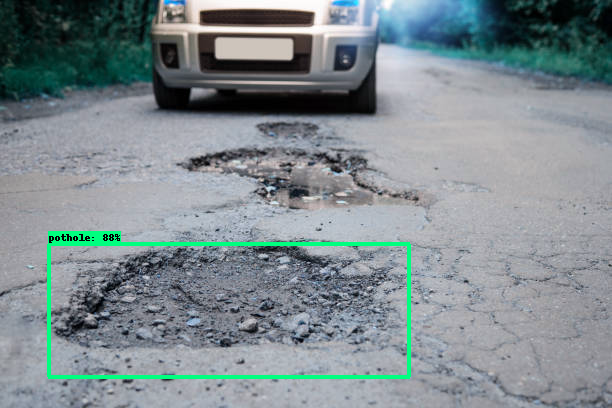

In [46]:
test_image_path = '/content/pothole3.jpeg'
image_np = load_image_into_numpy_array(test_image_path)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.uint8)
category_index = label_map_util.create_category_index_from_labelmap('/content/workspace/training_demo/exported-models/saved_model/assets/label_map.pbtxt')
detections = detect_fn_saved_model(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

dt_boxes = detections['detection_boxes']
dt_classes = detections['detection_classes']
dt_scores = detections['detection_scores']
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    dt_boxes,
    dt_classes,
    dt_scores,
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.65
)
from google.colab.patches import cv2_imshow
cv2_imshow(image_np_with_detections)

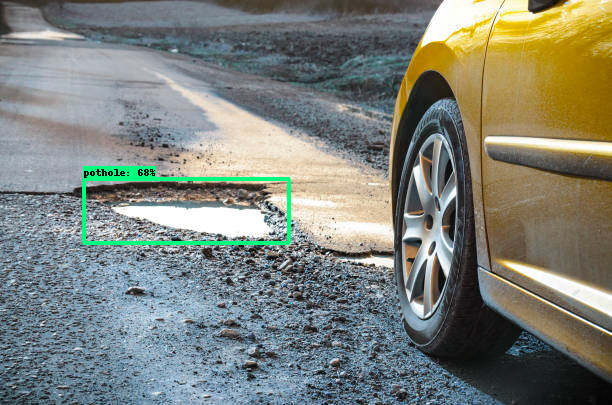

In [47]:
test_image_path = '/content/pothole4.jpeg'
image_np = load_image_into_numpy_array(test_image_path)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.uint8)
category_index = label_map_util.create_category_index_from_labelmap('/content/workspace/training_demo/exported-models/saved_model/assets/label_map.pbtxt')
detections = detect_fn_saved_model(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

dt_boxes = detections['detection_boxes']
dt_classes = detections['detection_classes']
dt_scores = detections['detection_scores']
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    dt_boxes,
    dt_classes,
    dt_scores,
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.65
)
from google.colab.patches import cv2_imshow
cv2_imshow(image_np_with_detections)

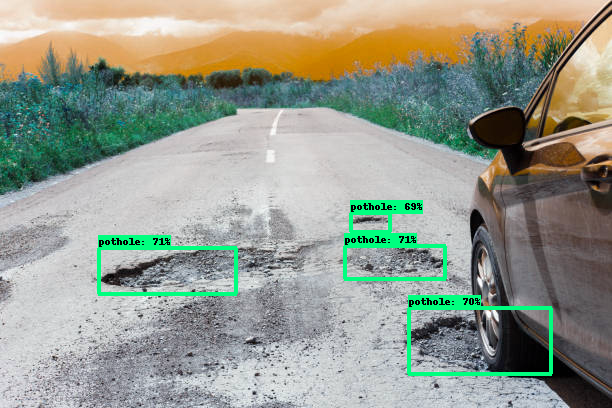

In [48]:
test_image_path = '/content/pothole5.jpeg'
image_np = load_image_into_numpy_array(test_image_path)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.uint8)
category_index = label_map_util.create_category_index_from_labelmap('/content/workspace/training_demo/exported-models/saved_model/assets/label_map.pbtxt')
detections = detect_fn_saved_model(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

dt_boxes = detections['detection_boxes']
dt_classes = detections['detection_classes']
dt_scores = detections['detection_scores']
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    dt_boxes,
    dt_classes,
    dt_scores,
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.65
)
from google.colab.patches import cv2_imshow
cv2_imshow(image_np_with_detections)

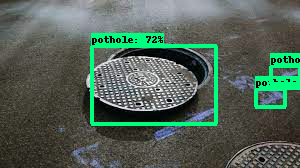

In [49]:
test_image_path = '/content/pothole6.jpeg'
image_np = load_image_into_numpy_array(test_image_path)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.uint8)
category_index = label_map_util.create_category_index_from_labelmap('/content/workspace/training_demo/exported-models/saved_model/assets/label_map.pbtxt')
detections = detect_fn_saved_model(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

dt_boxes = detections['detection_boxes']
dt_classes = detections['detection_classes']
dt_scores = detections['detection_scores']
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    dt_boxes,
    dt_classes,
    dt_scores,
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.65
)
from google.colab.patches import cv2_imshow
cv2_imshow(image_np_with_detections)

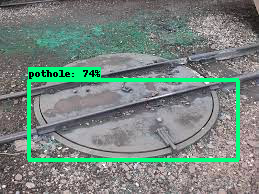

In [51]:
test_image_path = '/content/pothole7.jpeg'
image_np = load_image_into_numpy_array(test_image_path)
input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.uint8)
category_index = label_map_util.create_category_index_from_labelmap('/content/workspace/training_demo/exported-models/saved_model/assets/label_map.pbtxt')
detections = detect_fn_saved_model(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

dt_boxes = detections['detection_boxes']
dt_classes = detections['detection_classes']
dt_scores = detections['detection_scores']
image_np_with_detections = image_np.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections,
    dt_boxes,
    dt_classes,
    dt_scores,
    category_index,
    use_normalized_coordinates=True,
    min_score_thresh=0.65
)
from google.colab.patches import cv2_imshow
cv2_imshow(image_np_with_detections)

#Documentation:

The above trained model has been trained on the dataset : https://public.roboflow.com/object-detection/pothole/1

Possible applications of the same include :

1. Applications in autonomous cars to prevent any accidents by entering into potholes which do not appear in LiDAR data.

2. Applications in government softwares to help identify regions in need of repairs to prevent civilians from any harm that can come from these potholes.
